<a href="https://colab.research.google.com/github/Kabindra02/lung-cancer-detection/blob/main/AI_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore', category=SyntaxWarning)


**LOAD DATASET**

---




In [48]:
data = pd.read_csv('/content/dataset.csv')
data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


**DATASET OVERVIEW**

Features:

GENDER,
AGE,
SMOKING,
YELLOW_FINGERS,
ANXIETY,
PEER_PRESSURE,
CHRONIC DISEASE,
FATIGUE,
ALLERGY,
WHEEZING,
ALCOHOL CONSUMING,
COUGHING,
SHORTNESS OF BREATH,
SWALLOWING DIFFICULTY,
CHEST PAIN

Target Variable:
LUNG_CANCER (YES/NO)

DATA INSPECTION

---



In [49]:
data.info()  #Provides a summary of the DataFrame, including data types and non-null counts.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [50]:
data.columns  #to get a list of the column names in a DataFrame.

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')

In [51]:
data.shape #gives the number of rows and columns in a DataFrame.

(309, 16)

the dataset contains 309 rows and 16 columns.

In [52]:
data.describe()  #to get a summary of statistics for numeric columns

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [53]:
data.dtypes   #to display the data types of each column

,0
GENDER,object
AGE,int64
SMOKING,int64
YELLOW_FINGERS,int64
ANXIETY,int64
PEER_PRESSURE,int64
CHRONIC DISEASE,int64
FATIGUE,int64
ALLERGY,int64
WHEEZING,int64


In [54]:
data.isnull().sum()   #to check for missing (null) values

,0
GENDER,0
AGE,0
SMOKING,0
YELLOW_FINGERS,0
ANXIETY,0
PEER_PRESSURE,0
CHRONIC DISEASE,0
FATIGUE,0
ALLERGY,0
WHEEZING,0


No null values were encountered

**Data Cleaning**

---



In [55]:
data['LUNG_CANCER'].value_counts()   #gives the count for number of occurence of yes or no in LUNG_CANCER column

,count
LUNG_CANCER,
YES,270
NO,39


out of 309 cases, 270 were positive for lung cancer

**Data Visualization**

---



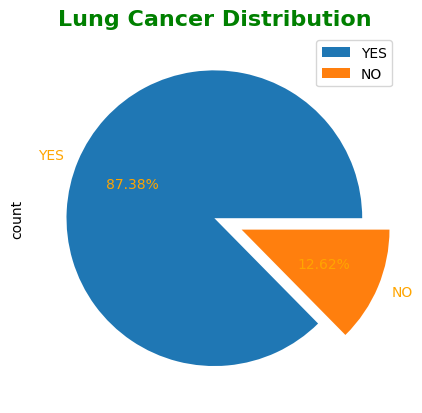

In [56]:
lung_cancer = data['LUNG_CANCER'].value_counts()
lung_cancer.plot(kind='pie', legend=True, textprops={'color': 'orange'}, explode=(0, 0.2), autopct='%.2f%%')
plt.title('Lung Cancer Distribution', fontsize=16, fontweight='bold', color='green')
plt.show()

**UNIVARIATE ANALYSIS**

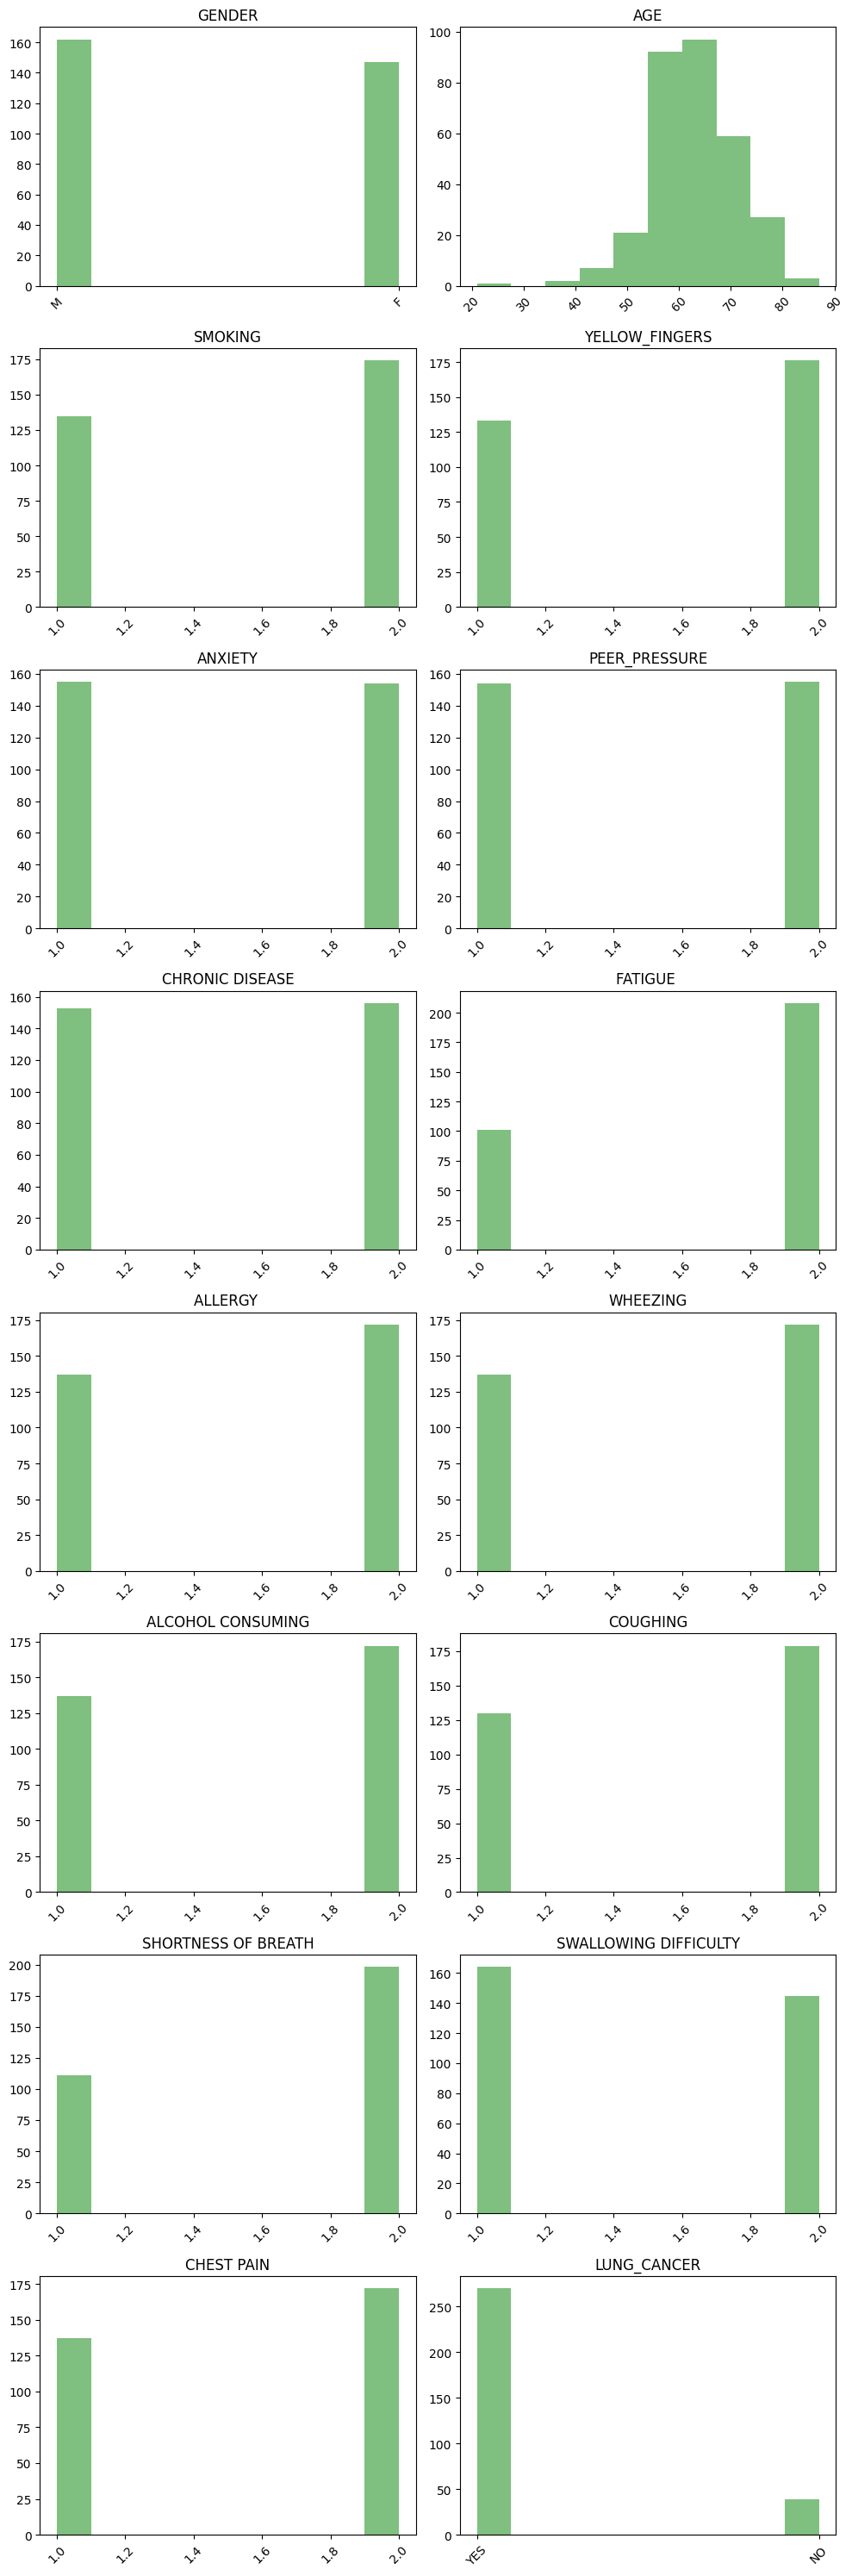

In [57]:
num_list = list(data.columns)

fig = plt.figure(figsize=(10,30))

for i in range(len(num_list)):
    plt.subplot(8,2,i+1)
    plt.title(num_list[i])
    plt.xticks(rotation=45)
    plt.hist(data[num_list[i]],color='green',alpha=0.5)

plt.tight_layout()

**BIVARIATE ANALYSIS**

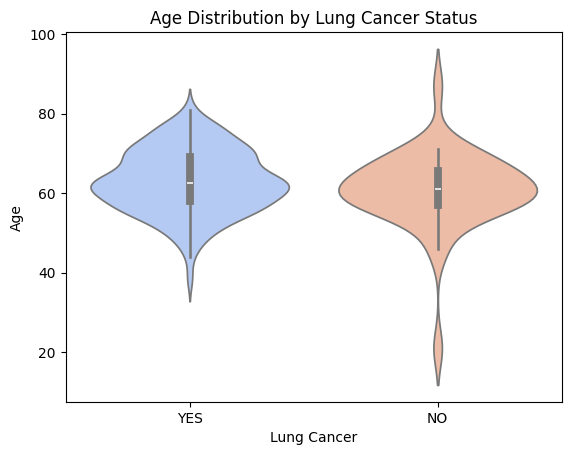

In [58]:
sns.violinplot(x='LUNG_CANCER', y='AGE', data=data, palette='coolwarm', hue='LUNG_CANCER')
plt.title('Age Distribution by Lung Cancer Status')
plt.xlabel('Lung Cancer')
plt.ylabel('Age')
plt.show()

**encoding categorical values into numerical values**

In [59]:

data['GENDER'] = data['GENDER'].map({'M':0,'F':1})
data['LUNG_CANCER'] = data['LUNG_CANCER'].map({'YES':1, 'NO':0})
data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,0,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,0,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,1,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,0,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,1,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0


splitting features and targeted columns

In [60]:
X = data.drop('LUNG_CANCER', axis=1)

In [62]:
y = data['LUNG_CANCER']

splitting the dataset into training and testing sets

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

splitting the dataset into 80% training and 20% testing subsets, with a random seed of 50 to ensure reproducibility of the split.

# **Model Training**

Using Naive Bayes

In [69]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train,y_train)
prediction=model.predict(X_test)

# **Model Testing and Performance Metrics**

1. Accuracy = (TP + TN) / (TP + TN + FP + FN)
                where TP = True Positive, TN = True Negative, FP = False Positive, FN = False Negative

2. Sensitivity/Recall = TP / (TP + FN)

3. Precision = TP / (TP + FP)

4. F1 Score = 2 * ((Precision * Sensitivity) / (Precision + Sensitivity))

5. Confusion Matrix = provides a summary of prediction results on a classification problem

In [70]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
confusion_matrix(y_test,prediction)

array([[ 6,  3],
       [ 3, 50]])

the matrix shows the count for [[TN, FP],[FN, TP]]

In [71]:
from sklearn.metrics import precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, prediction)
precision = precision_score(y_test, prediction)
recall = recall_score(y_test, prediction)
f1 = f1_score(y_test, prediction)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)

Accuracy: 0.9032258064516129
Precision: 0.9433962264150944
Recall: 0.9433962264150944
F1 score: 0.9433962264150944


The model performs really well, correctly predicting 90.32% of cases. With both precision and recall at 94.34%, it’s great at identifying positives while minimizing mistakes. The balanced F1 score confirms it’s reliable and consistent for making accurate predictions.

Accuracy: 0.9032
Confusion Matrix:
[[ 6  3]
 [ 3 50]]


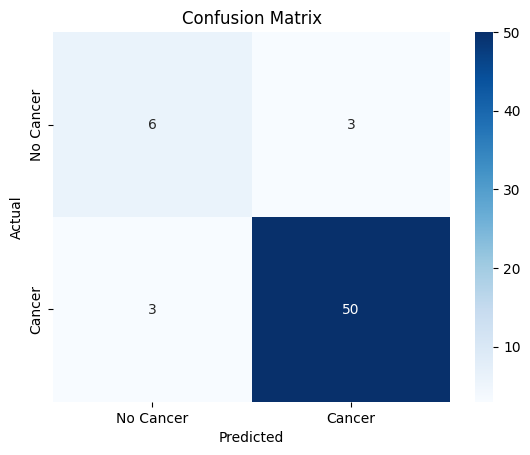

In [77]:
accuracy = accuracy_score(y_test, prediction)
print(f"Accuracy: {accuracy:.4f}")




conf_matrix = confusion_matrix(y_test, prediction)
print("Confusion Matrix:")
print(conf_matrix)

# Visualizing the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Cancer', 'Cancer'], yticklabels=['No Cancer', 'Cancer'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

The model shows strong performance with 90.3% accuracy, high precision (94.3%), and recall (94.3%). It minimizes errors, with only 3 false positives and 3 false negatives, demonstrating reliability in distinguishing cancer cases.